# 1) Delivery_time -> Predict delivery time using sorting time 

## Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns

## Reading CSV file using pandas library

In [27]:
delivery_time_data = pd.read_csv('delivery_time.csv')
delivery_time_data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


#### 
    x - continuous (independent)
    y - continuous (dependent)
    So here , 
        x ====> sorting time
        y ====> delivery time

In [28]:
delivery_time_data = delivery_time_data.rename(columns= {'Delivery Time' : 'd_t' , 'Sorting Time' : 's_t'})

In [29]:
delivery_time_data.head()

,d_t,s_t
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


## Initial Investigation

In [30]:
delivery_time_data.shape

(21, 2)

In [31]:
delivery_time_data.isnull().sum()

d_t    0
s_t    0
dtype: int64

In [32]:
delivery_time_data.dtypes

d_t    float64
s_t      int64
dtype: object

## Assumptions Check

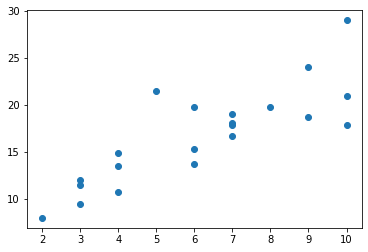

In [34]:
plt.scatter(x = 's_t' , y = 'd_t',data = delivery_time_data )

#### A correlation analysis provides information on the strength and direction of the linear relationship between two variables

In [35]:
delivery_time_data.corr() 

,d_t,s_t
d_t,1.000000,0.825997
s_t,0.825997,1.000000


## Model Building and Model Training

### Linear Regression with Statsmodels

In [46]:
## ols - ordinary least squares ----> Inorder to find the best fit line
model_1 = smf.ols('d_t ~ s_t', data = delivery_time_data).fit()

Text(0, 0.5, 'Delivery time')

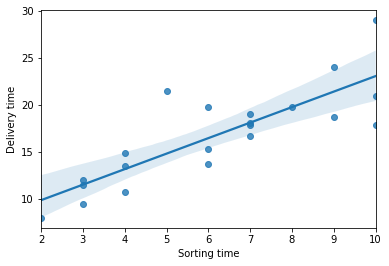

In [47]:
sns.regplot(x = 's_t',y = 'd_t', data = delivery_time_data)
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")

In [48]:
model_1.params

Intercept    6.582734
s_t          1.649020
dtype: float64

In [49]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    d_t   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 20 Aug 2021   Prob (F-statistic):           3.98e-06
Time:                        19:28:11   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
s_t            1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
model_2 = smf.ols('d_t ~ np.log(s_t)',data = delivery_time_data).fit() 

In [52]:
model_2.params

Intercept      1.159684
np.log(s_t)    9.043413
dtype: float64

In [54]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    d_t   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Fri, 20 Aug 2021   Prob (F-statistic):           2.64e-06
Time:                        19:30:23   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(s_t)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

pred_1 = model_1.predict(delivery_time_data)

In [59]:
pred_1

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

Text(0, 0.5, 'Delivery time')

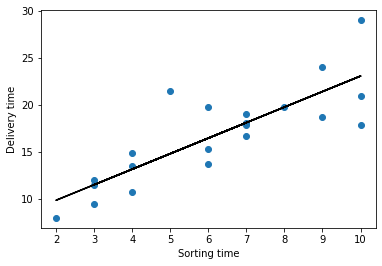

In [60]:
plt.scatter(x = 's_t', y = 'd_t',data = delivery_time_data)
plt.plot(delivery_time_data.s_t, pred_1,color='black')
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")

In [61]:
pred_2 = model_2.predict(delivery_time_data)

In [62]:
pred_2

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

Text(0, 0.5, 'Delivery time')

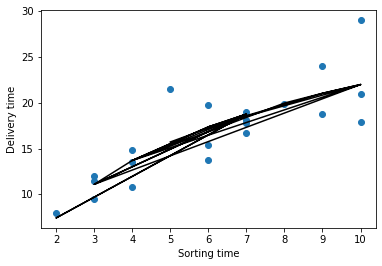

In [63]:
plt.scatter(x = 's_t', y = 'd_t',data = delivery_time_data)
plt.plot(delivery_time_data.s_t, pred_2,color='black')
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")

#### model_2 is slightly better than model_1